In [1]:
import os
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.utils.data import DataLoader
from PIL import Image
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision.utils import make_grid
from torchvision.datasets import ImageFolder
from torchsummary import summary

%matplotlib inline

In [27]:
data_dir = "./data"
train_dir = "./data/train"
valid_dir = "./data/valid"

diseases = os.listdir(train_dir)
if ".DS_Store" in diseases:
    diseases.remove(".DS_Store")

In [13]:
print(diseases)
print(f"\nTotal disease classes are: {len(diseases)}")

['Strawberry___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Blueberry___healthy', 'Corn_(maize)___healthy', 'Tomato___Target_Spot', 'Peach___healthy', 'Potato___Late_blight', 'Tomato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Pepper,_bell___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Leaf_Mold', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Cherry_(including_sour)___Powdery_mildew', 'Apple___Cedar_apple_rust', 'Tomato___Bacterial_spot', 'Grape___healthy', 'Tomato___Early_blight', 'Corn_(maize)___Common_rust_', 'Grape___Esca_(Black_Measles)', 'Raspberry___healthy', 'Tomato___healthy', 'Cherry_(including_sour)___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Apple___Apple_scab', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Peach___Bacterial_spot', 'Pepper,_bell___Bacterial_spot', 'Tomato___Septoria_leaf_spot', 'Squash___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Apple___B

In [56]:
plants = []
NumberOfDiseases = 0
for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1

print(f"Unique Plants are: \n{plants}\n")
print(f"Number of plants: {len(plants)}")
print(f"Number of diseases: {NumberOfDiseases}")

Unique Plants are: 
['Strawberry', 'Grape', 'Potato', 'Blueberry', 'Corn_(maize)', 'Tomato', 'Peach', 'Pepper,_bell', 'Orange', 'Cherry_(including_sour)', 'Apple', 'Raspberry', 'Squash', 'Soybean']

Number of plants: 14
Number of diseases: 26


In [16]:
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))
    
img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

no. of images
Strawberry___healthy                                          320
Grape___Black_rot                                             826
Potato___Early_blight                                         700
Blueberry___healthy                                          1052
Corn_(maize)___healthy                                        814
Tomato___Target_Spot                                          983
Peach___healthy                                               252
Potato___Late_blight                                          700
Tomato___Late_blight                                         1337
Tomato___Tomato_mosaic_virus                                  262
Pepper,_bell___healthy                                       1035
Orange___Haunglongbing_(Citrus_greening)                     3855
Tomato___Leaf_Mold                                            667
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)                    754
Cherry_(including_sour)___Powdery_mildew                      737
Apple___Cedar_apple_rust                                      193
Tomato___Bacterial_spot                                      1489
Grape___healthy                                               297
Tomato___Early_blight                                         700
Corn_(maize)___Common_rust_                                   835
Grape___Esca_(Black_Measles)                                  969
Raspberry___healthy                                           260
Tomato___healthy                                             1114
Cherry_(including_sour)___healthy                             598
Tomato___Tomato_Yellow_Leaf_Curl_Virus                       3750
Apple___Apple_scab                                            441
Corn_(maize)___Northern_Leaf_Blight                           690
Tomato___Spider_mites Two-spotted_spider_mite                1174
Peach___Bacterial_spot                                       1608
Pepper,_bell___Bacterial_spot                                 698
Tomato___Septoria_leaf_spot                                  1240
Squash___Powdery_mildew                                      1285
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot            360
Apple___Black_rot                                             435
Apple___healthy                                              1152
Strawberry___Leaf_scorch                                      777
Potato___healthy                                              107
Soybean___healthy                                            3563

In [18]:
n_train = 0
for value in nums.values():
    n_train += value
print(f"There are {n_train} images for training")

There are 38029 images for training


In [21]:
train = ImageFolder(train_dir, transform=transforms.ToTensor())
valid = ImageFolder(valid_dir, transform=transforms.ToTensor()) 

In [22]:
img, label = train[0]
print(img.shape, label)
print(len(train.classes))

torch.Size([3, 256, 256]) 0
38


In [23]:
def show_image(image, label):
    print("Label :" + train.classes[label] + "(" + str(label) + ")")
    plt.imshow(image.permute(1, 2, 0))

Label :Apple___Apple_scab(0)


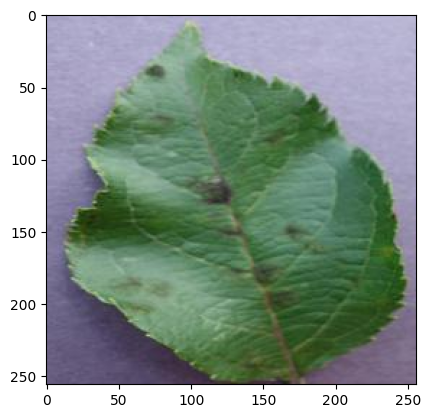

In [25]:
show_image(*train[0])

Label :Tomato___Septoria_leaf_spot(32)


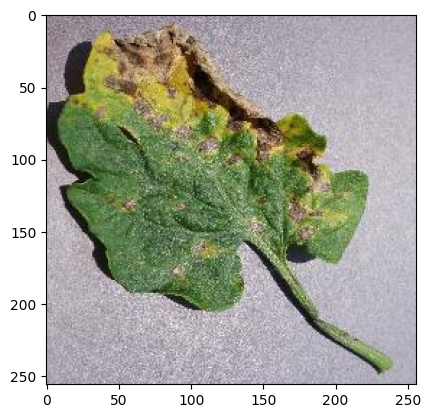

In [28]:
show_image(*train[30000])

In [29]:
random_seed = 7
torch.manual_seed(random_seed)

In [30]:
batch_size = 32

In [31]:
train_dl = DataLoader(train, batch_size, shuffle=True, num_workers=2, pin_memory=True)
valid_dl = DataLoader(valid, batch_size, num_workers=2, pin_memory=True)

In [32]:
def show_batch(data):
    for images, labels in data:
        fig, ax = plt.subplots(figsize=(30, 30))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=8).permute(1, 2, 0))
        break

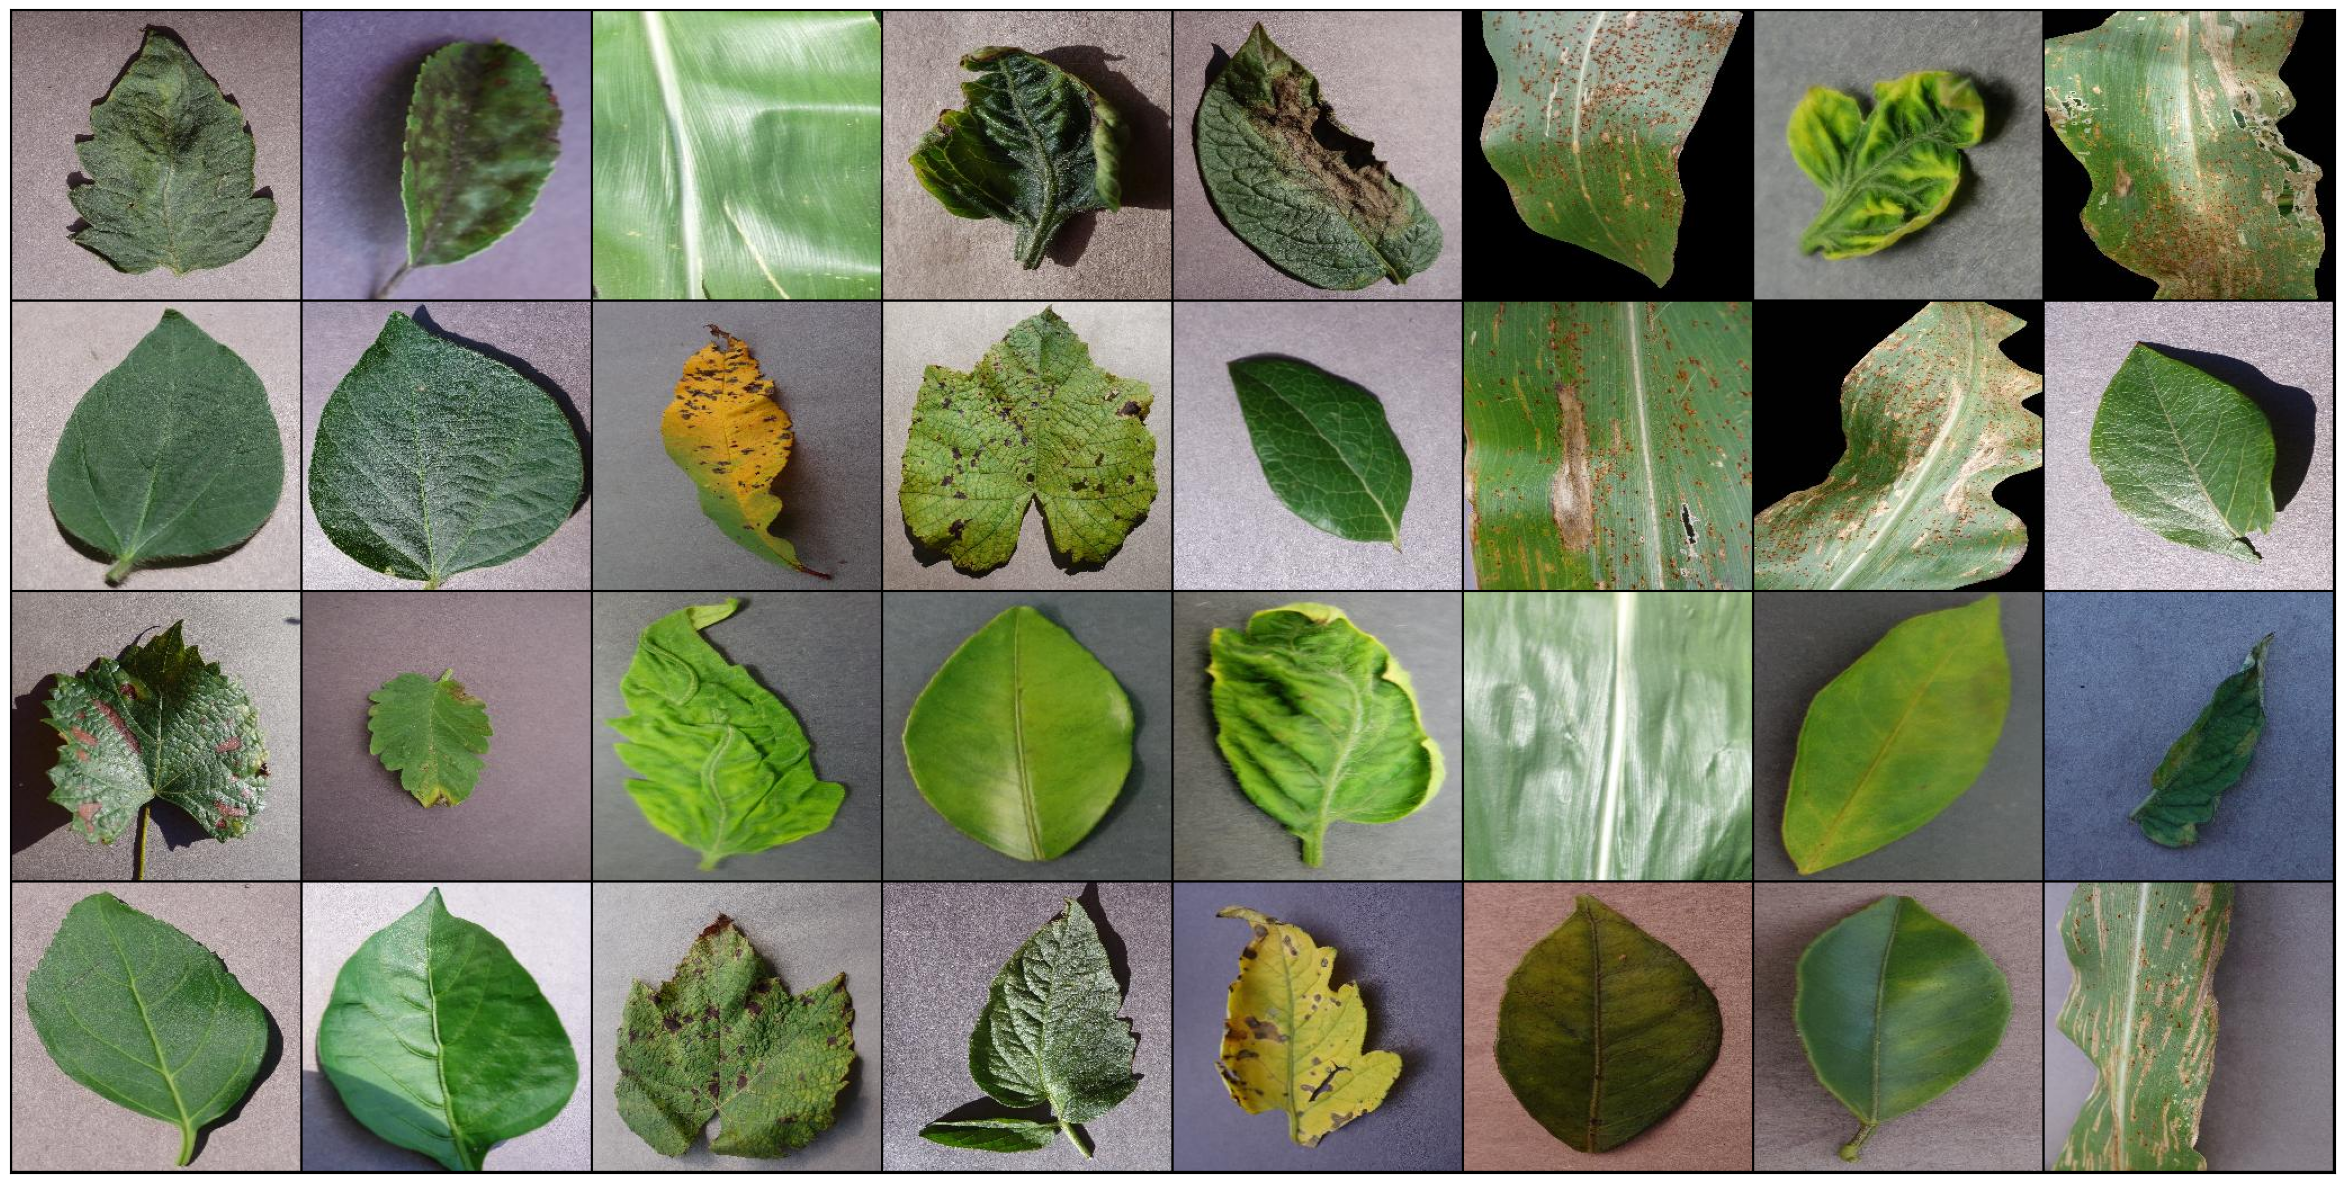

In [33]:
show_batch(train_dl)

In [76]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    # if torch.backends.mps.is_available():
    #     torch.set_default_device("mps")
    #     return torch.device("mps")
    # else:
    torch.set_default_device("cpu")
    return torch.device("cpu")

# for moving data to device (CPU or GPU)
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

# for loading in the device (GPU if available else CPU)
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)
        
    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [77]:
device = get_default_device()
device

device(type='cpu')

In [78]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

In [79]:
class SimpleResidualBlock(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.conv2(out)
        return self.relu2(out) + x

In [80]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))


# base class for the model
class ImageClassificationBase(nn.Module):
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                   # Generate prediction
        loss = F.cross_entropy(out, labels)  # Calculate loss
        acc = accuracy(out, labels)          # Calculate accuracy
        return {"val_loss": loss.detach(), "val_accuracy": acc}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x["val_loss"] for x in outputs]
        batch_accuracy = [x["val_accuracy"] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()       # Combine loss  
        epoch_accuracy = torch.stack(batch_accuracy).mean()
        return {"val_loss": epoch_loss, "val_accuracy": epoch_accuracy} # Combine accuracies
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_accuracy']))

In [81]:
def ConvBlock(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
             nn.BatchNorm2d(out_channels),
             nn.ReLU(inplace=True)]
    if pool:
        layers.append(nn.MaxPool2d(4))
    return nn.Sequential(*layers)


# resnet architecture 
class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_diseases):
        super().__init__()
        
        self.conv1 = ConvBlock(in_channels, 64)
        self.conv2 = ConvBlock(64, 128, pool=True) # out_dim : 128 x 64 x 64 
        self.res1 = nn.Sequential(ConvBlock(128, 128), ConvBlock(128, 128))
        
        self.conv3 = ConvBlock(128, 256, pool=True) # out_dim : 256 x 16 x 16
        self.conv4 = ConvBlock(256, 512, pool=True) # out_dim : 512 x 4 x 44
        self.res2 = nn.Sequential(ConvBlock(512, 512), ConvBlock(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4),
                                       nn.Flatten(),
                                       nn.Linear(512, num_diseases))
        
    def forward(self, xb): # xb is the loaded batch
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [82]:
model = to_device(ResNet9(3, len(train.classes)), device) 
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [84]:
INPUT_SHAPE = (3, 256, 256)
print(summary(model, (INPUT_SHAPE)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 256, 256]           1,792
       BatchNorm2d-2         [-1, 64, 256, 256]             128
              ReLU-3         [-1, 64, 256, 256]               0
            Conv2d-4        [-1, 128, 256, 256]          73,856
       BatchNorm2d-5        [-1, 128, 256, 256]             256
              ReLU-6        [-1, 128, 256, 256]               0
         MaxPool2d-7          [-1, 128, 64, 64]               0
            Conv2d-8          [-1, 128, 64, 64]         147,584
       BatchNorm2d-9          [-1, 128, 64, 64]             256
             ReLU-10          [-1, 128, 64, 64]               0
           Conv2d-11          [-1, 128, 64, 64]         147,584
      BatchNorm2d-12          [-1, 128, 64, 64]             256
             ReLU-13          [-1, 128, 64, 64]               0
           Conv2d-14          [-1, 256,

In [85]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']
    

def fit_OneCycle(epochs, max_lr, model, train_loader, val_loader, weight_decay=0,
                grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # scheduler for one cycle learniing rate
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, steps_per_epoch=len(train_loader))
    
    
    for epoch in range(epochs):
        # Training
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
                
            optimizer.step()
            optimizer.zero_grad()
            
            # recording and updating learning rates
            lrs.append(get_lr(optimizer))
            sched.step()
            
    
        # validation
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
        
    return history

In [86]:
%%time
history = [evaluate(model, valid_dl)]
history

CPU times: user 44min 41s, sys: 10min 14s, total: 54min 55s
Wall time: 12min 27s


[{'val_loss': tensor(3.6402), 'val_accuracy': tensor(0.0398)}]

In [87]:
epochs = 2
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [88]:
%%time
history += fit_OneCycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=1e-4, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00812, train_loss: 1.3490, val_loss: 0.8983, val_acc: 0.7425
Epoch [1], last_lr: 0.00000, train_loss: 0.1976, val_loss: 0.1212, val_acc: 0.9692
CPU times: user 12h 8min 50s, sys: 2h 48min 12s, total: 14h 57min 2s
Wall time: 5h 1min 35s


In [89]:
def plot_accuracies(history):
    accuracies = [x['val_accuracy'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs')

def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs')
    
def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.')

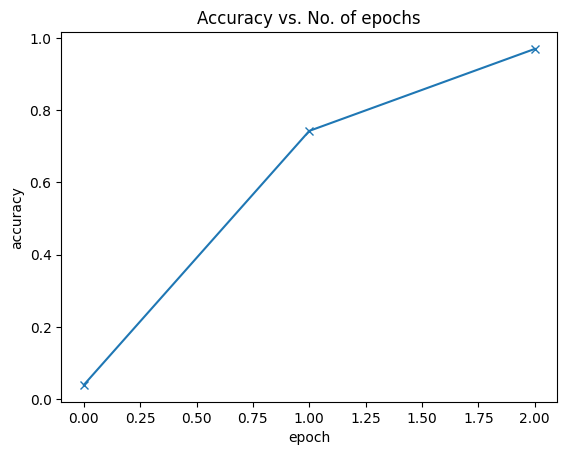

In [90]:
plot_accuracies(history)

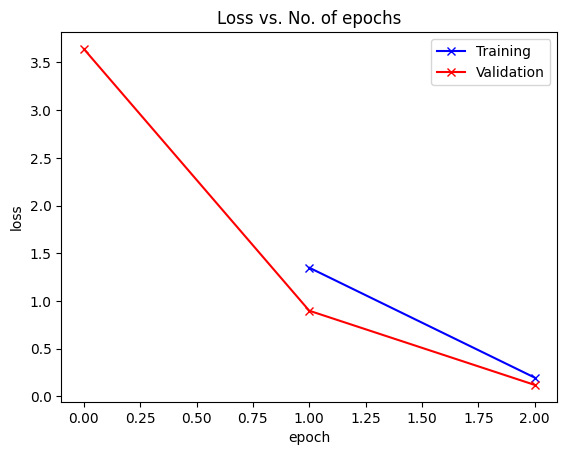

In [91]:
plot_losses(history)

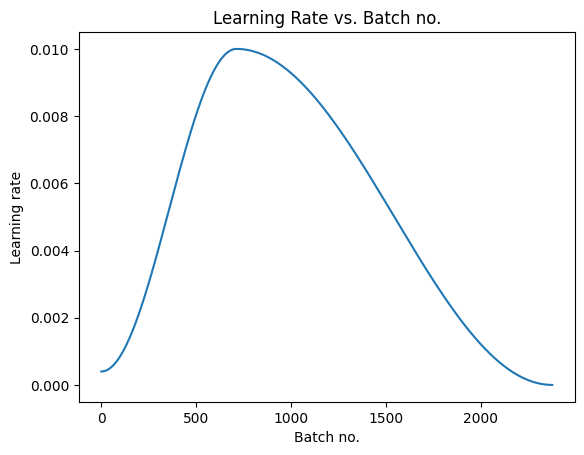

In [92]:
plot_lrs(history)

In [106]:
test_dir = "./data/test"
test = ImageFolder(test_dir, transform=transforms.ToTensor())

In [107]:
test_images = sorted(os.listdir(test_dir + "/test"))
test_images

['0001aa74-bbd7-433b-a900-1dccab39d521___FAM_L.Blight 4508.JPG',
 '002213fb-b620-4593-b9ac-6a6cc119b100___Com.G_TgS_FL 8360.JPG',
 '0027f9ae-818b-41d1-95c8-9e296bd0fdae___RS_HL 6902.JPG',
 '002f87b7-e1a5-49e5-a422-bb423630ded5___JR_HL 8068.JPG',
 '002ff75b-39d3-45b8-931f-e5f56eeddf03___RS_HL 2848.JPG',
 '00359c66-5d75-40ce-a5b7-6ef05959d2d2___Rut._Bact.S 1381.JPG',
 '003b7929-a364-4e74-be1c-37c4c0a6ec63___Com.G_SpM_FL 1414.JPG',
 '0045ba29-ed1b-43b4-afde-719cc7adefdb___GCREC_Bact.Sp 6254.JPG',
 '004cbe60-8ff9-4965-92df-e86694d5e9ba___RS_Erly.B 8253.JPG',
 '00532378-bfb2-4d3b-8b19-903ecc085624___RS_HL 2021.JPG',
 '005e3b43-9050-47da-9498-f9ecdcc703b3___RS_Late.B 5104.JPG',
 '00694db7-3327-45e0-b4da-a8bb7ab6a4b7___Crnl_L.Mold 6923.JPG',
 '008c85d0-a954-4127-bd26-861dc8a1e6ff___RS_HL 2431.JPG',
 '0098dbd9-286a-4d6a-bf4b-5459d66f88c0___RS_HL 5776.JPG',
 '00a14441-7a62-4034-bc40-b196aeab2785___RS_NLB 3932.JPG',
 '00a79a7b-8b96-452c-91c8-deb54eaa28e5___CREC_HLB 7231.JPG',
 '00b65fe8-cee1-4b6

In [108]:
def predict_image(img, model):
    """Converts image to array and return the predicted class
        with highest probability"""
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label

    return train.classes[preds[0].item()]

Label: 0001aa74-bbd7-433b-a900-1dccab39d521___FAM_L.Blight 4508.JPG , Predicted: Grape___Leaf_blight_(Isariopsis_Leaf_Spot)


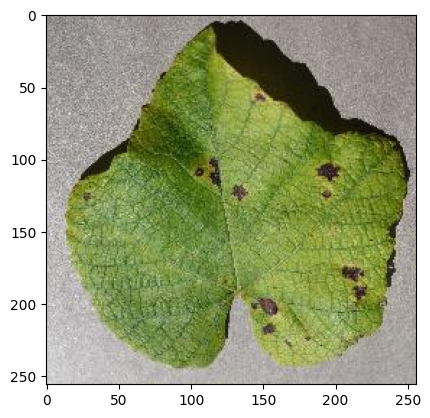

In [110]:
# predicting first image
img, label = test[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[0], ', Predicted:', predict_image(img, model))

In [111]:
for i, (img, label) in enumerate(test):
    print('Label:', test_images[i], ', Predicted:', predict_image(img, model))

Label: 0001aa74-bbd7-433b-a900-1dccab39d521___FAM_L.Blight 4508.JPG , Predicted: Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Label: 002213fb-b620-4593-b9ac-6a6cc119b100___Com.G_TgS_FL 8360.JPG , Predicted: Tomato___Target_Spot
Label: 0027f9ae-818b-41d1-95c8-9e296bd0fdae___RS_HL 6902.JPG , Predicted: Soybean___healthy
Label: 002f87b7-e1a5-49e5-a422-bb423630ded5___JR_HL 8068.JPG , Predicted: Pepper,_bell___healthy
Label: 002ff75b-39d3-45b8-931f-e5f56eeddf03___RS_HL 2848.JPG , Predicted: Soybean___healthy
Label: 00359c66-5d75-40ce-a5b7-6ef05959d2d2___Rut._Bact.S 1381.JPG , Predicted: Peach___Bacterial_spot
Label: 003b7929-a364-4e74-be1c-37c4c0a6ec63___Com.G_SpM_FL 1414.JPG , Predicted: Tomato___Spider_mites Two-spotted_spider_mite
Label: 0045ba29-ed1b-43b4-afde-719cc7adefdb___GCREC_Bact.Sp 6254.JPG , Predicted: Tomato___Bacterial_spot
Label: 004cbe60-8ff9-4965-92df-e86694d5e9ba___RS_Erly.B 8253.JPG , Predicted: Tomato___Early_blight
Label: 00532378-bfb2-4d3b-8b19-903ecc085624___RS_HL 2021.

In [112]:
PATH = './plant-disease-model.pth'  
torch.save(model.state_dict(), PATH)

In [113]:
PATH = './plant-disease-model-complete.pth'
torch.save(model, PATH)